In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'fichier_gap.xlsx'
df = pd.read_excel(file_path)
irregularite = df['Irregularity'].dropna()

In [3]:
# Paramètres des intervalles (uniquement positifs)
pas = 0.1
irreg_min = 0.0 
irreg_max = np.ceil(irregularite.max() / pas) * pas

In [4]:
# Création des intervalles positifs avec un pas de 0.1
bins = np.arange(irreg_min, irreg_max + pas, pas)
intervals = [(round(bins[i], 1), round(bins[i+1], 1)) for i in range(len(bins)-1)]

# Compter le nombre de benzénoïdes dans chaque intervalle positif
counts = {f"[{interval[0]}:{interval[1]}[": 0 for interval in intervals}

for val in irregularite:
    if val >= 0:  # On ne compte que les valeurs positives
        for i, interval in enumerate(intervals):
            if interval[0] <= val <= interval[1]:
                counts[f"[{interval[0]}:{interval[1]}["] += 1
                break

In [5]:
# Filtrage des intervalles avec au moins 1 benzénoïde
result_df = pd.DataFrame(list(counts.items()), columns=["Intervalle d'irrégularité", "Nombre de Benzénoïdes"])
result_df = result_df[result_df["Nombre de Benzénoïdes"] > 0]

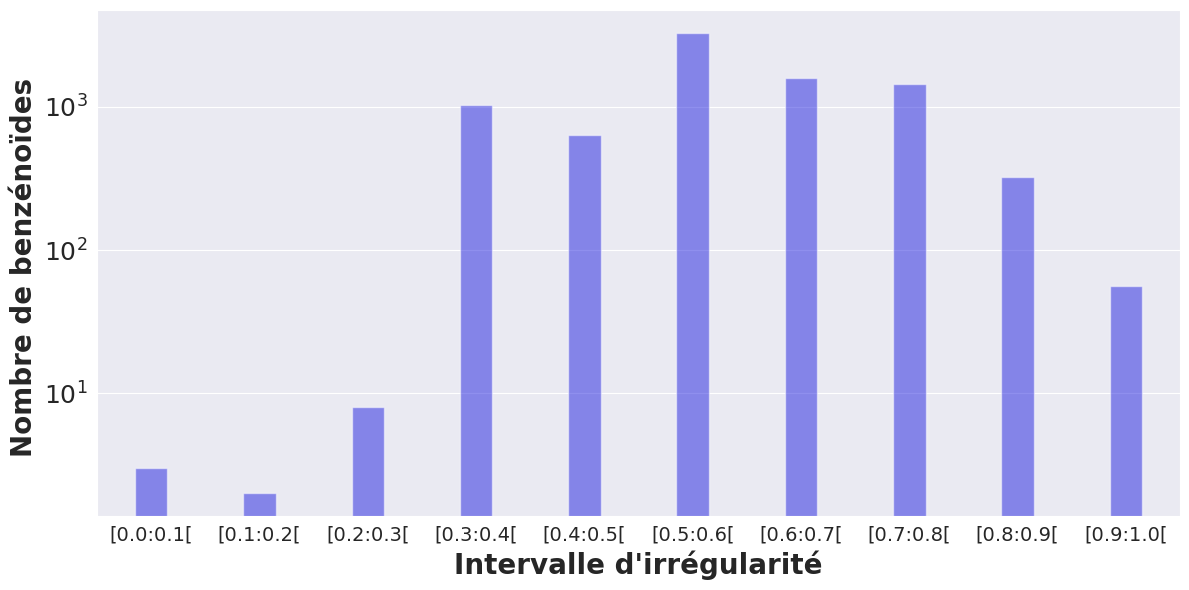

In [6]:
plt.figure(figsize=(12, 6))
#sns.set_style("whitegrid")
sns.set_style("darkgrid")
largeur_barre = 0.20
# Histogramme
ax = sns.barplot(
    x="Intervalle d'irrégularité", 
    y="Nombre de Benzénoïdes", 
    data=result_df,
    color='blue',
    alpha=0.5,
    width=0.30
)

#plt.title("Distribution des Benzénoïdes par degré d'irrégularité (valeurs positives)", fontsize=14, pad=20)
plt.yscale('log')
plt.xlabel("Intervalle d'irrégularité", fontsize=20, fontweight='bold')
plt.ylabel("Nombre de benzénoïdes ", fontsize=20, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)


plt.tight_layout()
#plt.savefig("irregularite.png", dpi=300)
plt.show()
